# Predicting the survival using the TITANIC DATASET

## Loading the libraries

In [1]:
import pandas as pd
import numpy as np
## For visualization
import matplotlib as plt
import seaborn as sn
#For machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

## Loading the train and test data

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv('test.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [41]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data visualization

In [44]:
%matplotlib inline

PassengerId       Axes(0.125,0.125;0.0945122x0.755)
Survived       Axes(0.238415,0.125;0.0945122x0.755)
Pclass         Axes(0.351829,0.125;0.0945122x0.755)
Age            Axes(0.465244,0.125;0.0945122x0.755)
SibSp          Axes(0.578659,0.125;0.0945122x0.755)
Parch          Axes(0.692073,0.125;0.0945122x0.755)
Fare           Axes(0.805488,0.125;0.0945122x0.755)
dtype: object

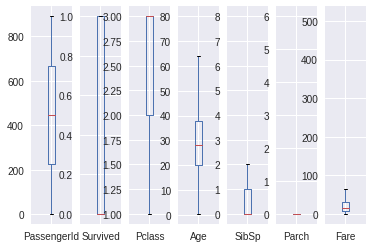

In [45]:
train_data.plot(kind='box',subplots=True)

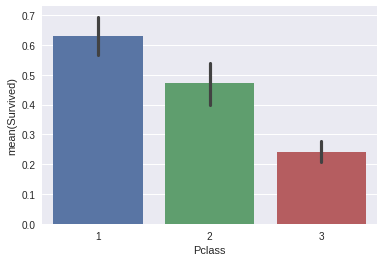

In [52]:
sn.barplot('Pclass','Survived',data=train_data)

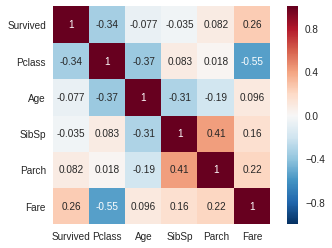

In [75]:
sn.heatmap(train_data.drop('PassengerId',axis=1).corr(),vmax=1,square=True,annot=True)

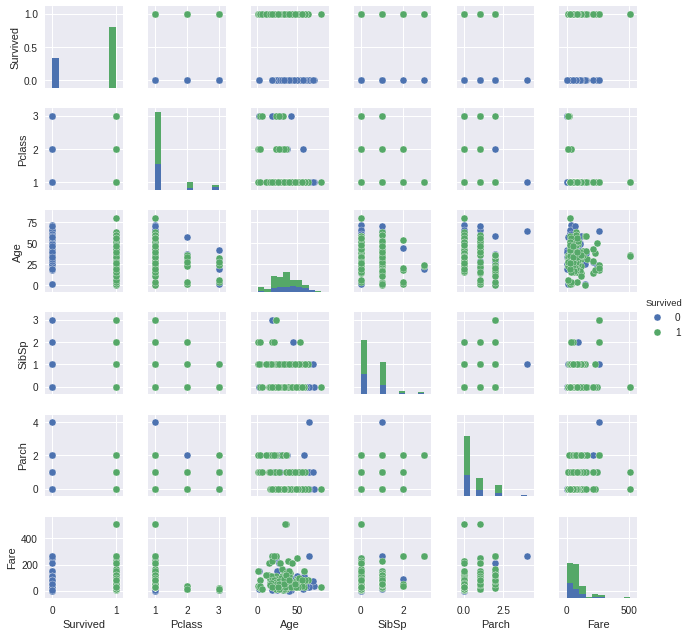

In [79]:
cols=['Survived','Pclass','Age','SibSp','Parch','Fare']
sn.pairplot(data=train_data.dropna(),vars=cols,size=1.5,hue='Survived')

### As you can see from the table above, there are missing values in the Age category.

In [189]:
train_data[train_data['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


### Replacing all the NaN values of age with the median

In [190]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [191]:
print(train_data['Age'].isnull().values.any())

False


### No more missing values in age

### Converting the embarked column from char to int

In [192]:
train_data['Embarked'][train_data['Embarked']=='S']=1
train_data['Embarked'][train_data['Embarked']=='C']=2
train_data['Embarked'][train_data['Embarked']=='Q']=3

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [193]:
train_data['Embarked'].head(10)

0    1
1    2
2    1
3    1
4    1
5    3
6    1
7    1
8    1
9    2
Name: Embarked, dtype: object

In [194]:
train_data['Sex'][train_data['Sex']=='male']=1
train_data['Sex'][train_data['Sex']=='female']=0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [195]:
print(train_data['Embarked'].isnull().values.any())

True


In [196]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [197]:
train_data['Embarked']=train_data['Embarked'].fillna(1)

In [198]:
print(train_data['Embarked'].isnull().values.any())

False


In [199]:
train_features = train_data[['Sex','Age']].values
train_labels = train_data['Survived'].values

## Splitting the train_data into train and test to check accuracy

In [200]:
features_train,features_test,labels_train,labels_test = train_test_split(train_features,train_labels,test_size=0.2,random_state=2)

## Using a classifier to predict the accuracy

In [201]:
clf = RandomForestClassifier()

In [202]:
clf.fit(features_train,labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [203]:
pred = clf.predict(features_test)

In [204]:
accuracy = list()
accuracy.append(accuracy_score(pred,labels_test))

In [205]:
print(accuracy)

[0.73184357541899436]


### Here, we get a accuracy of 75 which is not bad.However a accuracy of more than 80% is considered a good model

In [206]:
train_features=train_data[['Sex','Embarked','Pclass']].values

In [207]:
features_train,features_test,labels_train,labels_test = train_test_split(train_features,train_labels,test_size=0.4,random_state=42)

In [208]:
clf.fit(features_train,labels_train)
pred=clf.predict(features_test)
accuracy.append(accuracy_score(pred,labels_test))

In [209]:
print(accuracy)

[0.73184357541899436, 0.78991596638655459]


## After using ['sex','embarked'] as the features to classify, we get an accuracy of 77%,its good,still not good enough.

In [210]:
from sklearn.model_selection import KFold,cross_val_score

In [211]:
k_fold = KFold(n_splits=5)

In [212]:
for train,test in k_fold.split(train_features):
    clf.fit(train_features[train],train_labels[train]).score(train_features[test],train_labels[test])

In [213]:
cross_val_score(clf,train_features,train_labels,cv=k_fold,n_jobs=-1)

array([ 0.78212291,  0.80337079,  0.8258427 ,  0.76966292,  0.83146067])

In [214]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### There are missing values in Age and in Fare

In [215]:
test_data.shape

(418, 11)

In [216]:
test_data[test_data['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


In [217]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())

In [218]:
test_data['Age'].isnull().values.any()

False

### We removed all the null values from the age column

In [219]:
test_data['Embarked'][test_data['Embarked']=='S']=1
test_data['Embarked'][test_data['Embarked']=='C']=2
test_data['Embarked'][test_data['Embarked']=='Q']=3

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [220]:
test_data['Sex'][test_data['Sex']=='male']=1
test_data['Sex'][test_data['Sex']=='female']=0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [221]:
test_features = test_data[['Sex','Embarked','Pclass']]

In [222]:
accuracy_test = list()
PassengerId = np.array(test_data['PassengerId']).astype(int)
i=1
for train,test in k_fold.split(test_features):
    print(i)
    clf.fit(train_features[train],train_labels[train])
    pred=clf.predict(test_features)
    solution=pd.DataFrame(pred,PassengerId,columns=['Survived'])
    if i==1:
        print('solution2')
        solution.to_csv('solution2.csv',index_label=['PassengerId'])
    if i==2:
        print('solution3')
        solution.to_csv('solution3.csv',index_label=['PassengerId'])
    if i==3:
        print('solution4')
        solution.to_csv('solution4.csv',index_label=['PassengerId'])
    if i==4:
        print('solution5')
        solution.to_csv('solution5.csv',index_label=['PassengerId'])
    if i==5:
        print('solution6')
        solution.to_csv('solution6.csv',index_label=['PassengerId'])
    i=i+1

1
solution2
2
solution3
3
solution4
4
solution5
5
solution6


In [223]:
print(solution)

      Survived
892          0
893          0
894          0
895          0
896          0
897          0
898          1
899          0
900          0
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          0
911          0
912          0
913          0
914          1
915          0
916          1
917          0
918          1
919          0
920          0
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         0
1296         0
1297         0
1298         0
1299         0
1300         1
1301         0
1302         1
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


In [224]:
solution.head(20)

,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,0
901,0


In [225]:
test_data.shape

(418, 11)

In [226]:
train_data.shape

(891, 12)